In [0]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [0]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

df.reset_index(inplace=True)

In [3]:
# from the plot above we can see,ppltrst,pplfair,pplhlp are positively correlated with each other.
# so I will combine these three variables into a new variable

data1=df[['ppltrst','pplfair','pplhlp']]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 3 columns):
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
dtypes: float64(3)
memory usage: 191.1 KB


In [0]:
# take avergae of these three columns as the new feature

In [5]:
data1['avg'] = data1.mean(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
data1

,ppltrst,pplfair,pplhlp,avg
0,3.0,10.0,5.0,6.000000
1,5.0,7.0,5.0,5.666667
2,8.0,8.0,8.0,8.000000
3,6.0,6.0,7.0,6.333333
4,6.0,7.0,5.0,6.000000
...,...,...,...,...
8142,4.0,5.0,3.0,4.000000
8143,6.0,4.0,4.0,4.666667
8144,5.0,7.0,6.0,6.000000
8145,8.0,8.0,6.0,7.333333


In [7]:
data1["new1"] = data1["ppltrst"]*data1["pplfair"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
data1["new"] = data1['new1'] * data1["pplhlp"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
data1

,ppltrst,pplfair,pplhlp,avg,new1,new
0,3.0,10.0,5.0,6.000000,30.0,150.0
1,5.0,7.0,5.0,5.666667,35.0,175.0
2,8.0,8.0,8.0,8.000000,64.0,512.0
3,6.0,6.0,7.0,6.333333,36.0,252.0
4,6.0,7.0,5.0,6.000000,42.0,210.0
...,...,...,...,...,...,...
8142,4.0,5.0,3.0,4.000000,20.0,60.0
8143,6.0,4.0,4.0,4.666667,24.0,96.0
8144,5.0,7.0,6.0,6.000000,35.0,210.0
8145,8.0,8.0,6.0,7.333333,64.0,384.0


In [10]:
data1.drop(['ppltrst','pplfair','pplhlp','new1'], axis = 1)

,avg,new
0,6.000000,150.0
1,5.666667,175.0
2,8.000000,512.0
3,6.333333,252.0
4,6.000000,210.0
...,...,...
8142,4.000000,60.0
8143,4.666667,96.0
8144,6.000000,210.0
8145,7.333333,384.0


In [0]:
df = df.drop(['ppltrst','pplfair','pplhlp'], axis = 1)
df['ppl_avg']=data1['avg']
df['new'] =data1['new'] # column new is the product of three columns of ppl

In [12]:
df['partner'].value_counts()

1.0    5013
2.0    3134
Name: partner, dtype: int64

In [13]:
# since the target var is unbalanced, so I will sub-sampling
# randomly pick same number of rows from each type
df_pt1=df[df['partner']==1]
df_pt2=df[df['partner']==2]

frac_pt1 = df_pt1.sample(frac=0.6)

print(frac_pt1)
frac_pt2 = df_pt2.sample(frac=0.95) # to make sure two groups has about the same number of rows
print(frac_pt2)




      index cntry    idno  year  tvtot  ...  gndr  agea  partner   ppl_avg    new
1420   1491    CH  2745.0     7    5.0  ...   1.0  34.0      1.0  7.000000  300.0
1337   1399    CH  2419.0     7    0.0  ...   1.0  39.0      1.0  8.000000  512.0
3222   3434    ES  1325.0     6    4.0  ...   2.0  29.0      1.0  4.333333   72.0
7481   7901    SE   753.0     7    6.0  ...   2.0  67.0      1.0  5.000000   96.0
5001   5316    NO  6312.0     6    4.0  ...   1.0  49.0      1.0  7.333333  392.0
...     ...   ...     ...   ...    ...  ...   ...   ...      ...       ...    ...
1790   1898    CZ  1358.0     6    5.0  ...   1.0  42.0      1.0  7.000000  343.0
1154   1209    CH  1637.0     7    5.0  ...   2.0  69.0      1.0  5.666667  144.0
798     839    CH   333.0     7    5.0  ...   1.0  34.0      1.0  7.666667  432.0
3066   3271    ES   961.0     6    6.0  ...   1.0  54.0      1.0  5.000000  120.0
5080   5396    NO  7878.0     6    1.0  ...   1.0  32.0      1.0  7.000000  343.0

[3008 rows x 13

In [14]:
new_df=pd.concat([frac_pt1,frac_pt2])
new_df

,index,cntry,idno,year,tvtot,happy,sclmeet,sclact,gndr,agea,partner,ppl_avg,new
1420,1491,CH,2745.0,7,5.0,9.0,5.0,3.0,1.0,34.0,1.0,7.000000,300.0
1337,1399,CH,2419.0,7,0.0,9.0,4.0,3.0,1.0,39.0,1.0,8.000000,512.0
3222,3434,ES,1325.0,6,4.0,9.0,7.0,3.0,2.0,29.0,1.0,4.333333,72.0
7481,7901,SE,753.0,7,6.0,9.0,5.0,3.0,2.0,67.0,1.0,5.000000,96.0
5001,5316,NO,6312.0,6,4.0,8.0,6.0,3.0,1.0,49.0,1.0,7.333333,392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,124,CH,570.0,6,3.0,8.0,6.0,3.0,2.0,19.0,2.0,7.333333,392.0
5538,5872,NO,18684.0,6,7.0,9.0,7.0,3.0,1.0,70.0,2.0,6.333333,245.0
5171,5489,NO,10134.0,6,7.0,6.0,5.0,2.0,1.0,72.0,2.0,6.333333,245.0
5918,6260,NO,10950.0,7,3.0,5.0,6.0,3.0,2.0,19.0,2.0,2.666667,12.0


In [15]:
new_df = new_df.sample(frac=1, axis=0).reset_index(drop=True)
new_df

,index,cntry,idno,year,tvtot,happy,sclmeet,sclact,gndr,agea,partner,ppl_avg,new
0,5856,NO,18390.0,6,4.0,7.0,6.0,3.0,2.0,54.0,2.0,6.000000,210.0
1,3262,ES,947.0,6,5.0,3.0,4.0,2.0,2.0,62.0,2.0,2.000000,8.0
2,157,CH,685.0,6,7.0,5.0,6.0,1.0,1.0,60.0,2.0,5.333333,98.0
3,6007,NO,21318.0,6,2.0,9.0,5.0,4.0,1.0,48.0,1.0,7.000000,336.0
4,5525,NO,10896.0,6,2.0,9.0,6.0,3.0,1.0,29.0,2.0,6.000000,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,5826,NO,17802.0,6,4.0,9.0,3.0,3.0,2.0,60.0,2.0,7.666667,441.0
5981,3551,ES,1595.0,6,5.0,5.0,7.0,1.0,1.0,28.0,2.0,2.333333,5.0
5982,5148,ES,2471.0,7,6.0,6.0,6.0,2.0,1.0,71.0,1.0,2.000000,0.0
5983,1177,CH,1490.0,7,5.0,8.0,4.0,2.0,1.0,33.0,1.0,7.333333,360.0


In [16]:
new_df['cntry'].value_counts() # 5 columns of dummies var

ES    1709
SE    1248
CH    1084
NO    1018
CZ     905
DE      21
Name: cntry, dtype: int64

In [17]:
#standardize whole dataset, or normalize dataset??? question
from sklearn import preprocessing
y = new_df['partner'] - 1
X = new_df.loc[:, ~df.columns.isin(['partner','idno','cntry','index'])]

X_norm = preprocessing.normalize(X) # z score standardization
X_norm


array([[0.02761665, 0.0184111 , 0.03221943, ..., 0.24854988, 0.02761665,
        0.96658287],
       [0.09479726, 0.07899772, 0.04739863, ..., 0.97957167, 0.03159909,
        0.12639634],
       [0.05186997, 0.06051496, 0.04322497, ..., 0.51869968, 0.04610664,
        0.84720948],
       ...,
       [0.09700726, 0.08314908, 0.08314908, ..., 0.98393081, 0.02771636,
        0.        ],
       [0.01934752, 0.01381966, 0.02211145, ..., 0.09120973, 0.02026883,
        0.99501523],
       [0.04531802, 0.01942201, 0.05179202, ..., 0.34959614, 0.03668601,
        0.93225638]])

In [18]:
pd.get_dummies(new_df['cntry'])

,CH,CZ,DE,ES,NO,SE
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
5980,0,0,0,0,1,0
5981,0,0,0,1,0,0
5982,0,0,0,1,0,0
5983,1,0,0,0,0,0


In [19]:
type(new_df['cntry'])
X_norm = pd.DataFrame(X_norm)
print(X_norm)

             0         1         2  ...         6         7         8
0     0.027617  0.018411  0.032219  ...  0.248550  0.027617  0.966583
1     0.094797  0.078998  0.047399  ...  0.979572  0.031599  0.126396
2     0.051870  0.060515  0.043225  ...  0.518700  0.046107  0.847209
3     0.017661  0.005887  0.026492  ...  0.141291  0.020605  0.989040
4     0.035072  0.011691  0.052607  ...  0.169512  0.035072  0.982003
...        ...       ...       ...  ...       ...       ...       ...
5980  0.013474  0.008983  0.020211  ...  0.134740  0.017217  0.990337
5981  0.194518  0.162098  0.162098  ...  0.907750  0.075646  0.162098
5982  0.097007  0.083149  0.083149  ...  0.983931  0.027716  0.000000
5983  0.019348  0.013820  0.022111  ...  0.091210  0.020269  0.995015
5984  0.045318  0.019422  0.051792  ...  0.349596  0.036686  0.932256

[5985 rows x 9 columns]


In [20]:
X_norm.isnull().sum()*100/X_norm.isnull().count()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
dtype: float64

In [0]:
# Make the categorical variable 'country' into dummies.
X_norm = pd.concat([X_norm, pd.get_dummies(new_df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X_norm.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X_norm[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X_norm[offset:], y[offset:]

In [22]:
X_norm

,0,1,2,3,4,5,6,7,8,CH,CZ,DE,ES,NO,SE
0,0.027617,0.018411,0.032219,0.027617,0.013808,0.009206,0.248550,0.027617,0.966583,0,0,0,0,1,0
1,0.094797,0.078998,0.047399,0.063198,0.031599,0.031599,0.979572,0.031599,0.126396,0,0,0,1,0,0
2,0.051870,0.060515,0.043225,0.051870,0.008645,0.008645,0.518700,0.046107,0.847209,1,0,0,0,0,0
3,0.017661,0.005887,0.026492,0.014718,0.011774,0.002944,0.141291,0.020605,0.989040,0,0,0,0,1,0
4,0.035072,0.011691,0.052607,0.035072,0.017536,0.005845,0.169512,0.035072,0.982003,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,0.013474,0.008983,0.020211,0.006737,0.006737,0.004491,0.134740,0.017217,0.990337,0,0,0,0,1,0
5981,0.194518,0.162098,0.162098,0.226938,0.032420,0.032420,0.907750,0.075646,0.162098,0,0,0,1,0,0
5982,0.097007,0.083149,0.083149,0.083149,0.027716,0.013858,0.983931,0.027716,0.000000,0,0,0,1,0,0
5983,0.019348,0.013820,0.022111,0.011056,0.005528,0.002764,0.091210,0.020269,0.995015,1,0,0,0,0,0


In [23]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'learning_rate':0.05,
          'n_estimators': 30,
          'max_depth': 2,#decrease max_depth may reduce overfitting
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))



Training set accuracy:
Percent Type I errors: 0.16691422205718529
Percent Type II errors: 0.1927218715187523

Test set accuracy:
Percent Type I errors: 0.14357262103505844
Percent Type II errors: 0.19532554257095158


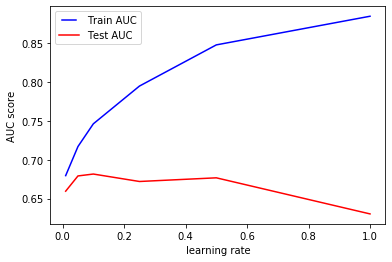

In [24]:
from sklearn.metrics import roc_curve, auc
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = ensemble.GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

In [25]:
ndf_1=pd.concat([X_norm, y], axis=1)
X_norm.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 'CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype='object')

In [26]:
ndf_1

,0,1,2,3,4,5,6,7,8,CH,CZ,DE,ES,NO,SE,partner
0,0.027617,0.018411,0.032219,0.027617,0.013808,0.009206,0.248550,0.027617,0.966583,0,0,0,0,1,0,1.0
1,0.094797,0.078998,0.047399,0.063198,0.031599,0.031599,0.979572,0.031599,0.126396,0,0,0,1,0,0,1.0
2,0.051870,0.060515,0.043225,0.051870,0.008645,0.008645,0.518700,0.046107,0.847209,1,0,0,0,0,0,1.0
3,0.017661,0.005887,0.026492,0.014718,0.011774,0.002944,0.141291,0.020605,0.989040,0,0,0,0,1,0,0.0
4,0.035072,0.011691,0.052607,0.035072,0.017536,0.005845,0.169512,0.035072,0.982003,0,0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,0.013474,0.008983,0.020211,0.006737,0.006737,0.004491,0.134740,0.017217,0.990337,0,0,0,0,1,0,1.0
5981,0.194518,0.162098,0.162098,0.226938,0.032420,0.032420,0.907750,0.075646,0.162098,0,0,0,1,0,0,1.0
5982,0.097007,0.083149,0.083149,0.083149,0.027716,0.013858,0.983931,0.027716,0.000000,0,0,0,1,0,0,0.0
5983,0.019348,0.013820,0.022111,0.011056,0.005528,0.002764,0.091210,0.020269,0.995015,1,0,0,0,0,0,0.0


In [27]:
ndf_1.isnull().sum()*100/ndf_1.isnull().count()

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
CH         0.0
CZ         0.0
DE         0.0
ES         0.0
NO         0.0
SE         0.0
partner    0.0
dtype: float64

In [0]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import cross_validate
from sklearn import metrics
#from sklearn.grid_search import GridSearchCV   #Perforing grid search


In [0]:

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['partner'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validate(alg, dtrain[predictors], dtrain['partner'], cv=cv_folds, scoring='roc_auc')
        print(cv_score)
        print(cv_score["test_score"])
        print(np.mean(cv_score['test_score']))
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['partner'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['partner'], dtrain_predprob))
    
    if performCV:
       print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score['test_score']),np.std(cv_score['test_score']),np.min(cv_score['test_score']),np.max(cv_score['test_score'])))
        
    #Print Feature Importance:
    if printFeatureImportance:
       feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
       feat_imp.plot(kind='bar', title='Feature Importances')
       plt.ylabel('Feature Importance Score')

{'fit_time': array([0.50581622, 0.52450871, 0.50486445, 0.50615668, 0.51228809]), 'score_time': array([0.00490713, 0.00483513, 0.00477958, 0.0050714 , 0.00522637]), 'test_score': array([0.72583558, 0.74047916, 0.75528211, 0.75799298, 0.76752471])}
[0.72583558 0.74047916 0.75528211 0.75799298 0.76752471]
0.7494229104954221

Model Report
Accuracy : 0.7397
AUC Score (Train): 0.827968
CV Score : Mean - 0.7494229 | Std - 0.01464107 | Min - 0.7258356 | Max - 0.7675247


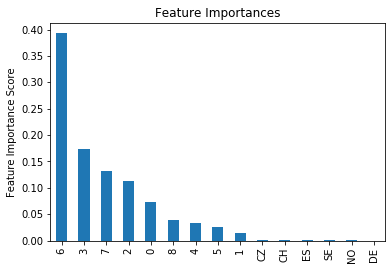

In [30]:
#Choose all predictors except target & IDcols
predictors = X_norm.columns
gbm0 = ensemble.GradientBoostingClassifier(random_state=10)
modelfit(gbm0, ndf_1, predictors)

In [0]:
# get rid of country dummies 
ndf_1 = ndf_1.drop(['ES','CH','CZ','SE','NO','DE'],axis=1)


In [39]:
from sklearn.model_selection import GridSearchCV
predictors = X_norm
param_test1 = {'n_estimators':range(20,201,10)}
gsearch1 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1)
print(gsearch1.best_params_)
print(gsearch1.best_score_)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [42]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 9, 'min_samples_split': 400}, 0.7608011224939177)

In [43]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 40, 'min_samples_split': 1000}, 0.7441359900600224)